### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 2
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 40
customer_demand_per_step = [1,2]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 5
with_manufacturer = True
cw_shipment_amount = 10
manufacturer_prod_capacity_per_step = 10

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 13
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 2 ; Lost sales: 0

-> Production plant:
manufacturer ; Production per step: 10 ; Inventory: 100
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(cw_inventory:Discrete(41), rw_inventories:MultiDiscrete([31 31]))
Action space: MultiDiscrete([2 2 2])
Starting state: {'rw_inventories': array([10, 10]), 'cw_inventory': 13}
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=300000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 2.41     |
| time/              |          |
|    fps             | 848      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 2.86         |
| time/                   |              |
|    fps                  | 576          |
|    iterations           | 2            |
|    time_elapsed         | 7            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0131344795 |
|    clip_fraction        | 0.153        |
|    clip_range           | 0.2          |
|    en

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 3.83        |
| time/                   |             |
|    fps                  | 498         |
|    iterations           | 11          |
|    time_elapsed         | 45          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.011185413 |
|    clip_fraction        | 0.122       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.71       |
|    explained_variance   | 0.436       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.315       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0196     |
|    value_loss           | 0.6         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 4.73        |
| time/                   |             |
|    fps                  | 466         |
|    iterations           | 21          |
|    time_elapsed         | 92          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.011787428 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.31       |
|    explained_variance   | 0.398       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.276       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.0167     |
|    value_loss           | 0.854       |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30      

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 5.32        |
| time/                   |             |
|    fps                  | 456         |
|    iterations           | 31          |
|    time_elapsed         | 139         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.010993664 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.985      |
|    explained_variance   | 0.442       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.397       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.016      |
|    value_loss           | 1.07        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 5.97         |
| time/                   |              |
|    fps                  | 451          |
|    iterations           | 41           |
|    time_elapsed         | 186          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0067308675 |
|    clip_fraction        | 0.0734       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.73        |
|    explained_variance   | 0.472        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.572        |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00934     |
|    value_loss           | 1.22         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 6.65        |
| time/                   |             |
|    fps                  | 455         |
|    iterations           | 51          |
|    time_elapsed         | 229         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.006672484 |
|    clip_fraction        | 0.0833      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.633      |
|    explained_variance   | 0.445       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.865       |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00872    |
|    value_loss           | 1.49        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 7.34         |
| time/                   |              |
|    fps                  | 462          |
|    iterations           | 61           |
|    time_elapsed         | 270          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0069251177 |
|    clip_fraction        | 0.0693       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.519       |
|    explained_variance   | 0.53         |
|    learning_rate        | 0.0003       |
|    loss                 | 0.628        |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00554     |
|    value_loss           | 1.36         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30         |
|    ep_rew_mean          | 7.62       |
| time/                   |            |
|    fps                  | 464        |
|    iterations           | 71         |
|    time_elapsed         | 313        |
|    total_timesteps      | 145408     |
| train/                  |            |
|    approx_kl            | 0.00546892 |
|    clip_fraction        | 0.0557     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.469     |
|    explained_variance   | 0.608      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.499      |
|    n_updates            | 700        |
|    policy_gradient_loss | -0.00323   |
|    value_loss           | 1.24       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.79        |
| time/                   |             |
|    fps                  | 464         |
|    iterations           | 81          |
|    time_elapsed         | 356         |
|    total_timesteps      | 165888      |
| train/                  |             |
|    approx_kl            | 0.008951938 |
|    clip_fraction        | 0.0866      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.374      |
|    explained_variance   | 0.635       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.381       |
|    n_updates            | 800         |
|    policy_gradient_loss | -0.00723    |
|    value_loss           | 1.14        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 8.3         |
| time/                   |             |
|    fps                  | 460         |
|    iterations           | 91          |
|    time_elapsed         | 404         |
|    total_timesteps      | 186368      |
| train/                  |             |
|    approx_kl            | 0.005528164 |
|    clip_fraction        | 0.0707      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.369      |
|    explained_variance   | 0.352       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.99        |
|    n_updates            | 900         |
|    policy_gradient_loss | -0.00465    |
|    value_loss           | 2.17        |
-----------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30      

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 8.83         |
| time/                   |              |
|    fps                  | 457          |
|    iterations           | 101          |
|    time_elapsed         | 452          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0025687935 |
|    clip_fraction        | 0.0213       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.252       |
|    explained_variance   | 0.367        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.22         |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.0011      |
|    value_loss           | 2.72         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30         |
|    ep_rew_mean          | 8.95       |
| time/                   |            |
|    fps                  | 455        |
|    iterations           | 111        |
|    time_elapsed         | 498        |
|    total_timesteps      | 227328     |
| train/                  |            |
|    approx_kl            | 0.00547389 |
|    clip_fraction        | 0.0463     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.23      |
|    explained_variance   | 0.376      |
|    learning_rate        | 0.0003     |
|    loss                 | 1.08       |
|    n_updates            | 1100       |
|    policy_gradient_loss | -0.0016    |
|    value_loss           | 2.69       |
----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 9.02         |
| time/                   |              |
|    fps                  | 454          |
|    iterations           | 121          |
|    time_elapsed         | 544          |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0040964596 |
|    clip_fraction        | 0.0409       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.254       |
|    explained_variance   | 0.387        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.16         |
|    n_updates            | 1200         |
|    policy_gradient_loss | -0.00196     |
|    value_loss           | 2.66         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 8.94         |
| time/                   |              |
|    fps                  | 455          |
|    iterations           | 131          |
|    time_elapsed         | 588          |
|    total_timesteps      | 268288       |
| train/                  |              |
|    approx_kl            | 0.0046304297 |
|    clip_fraction        | 0.0626       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.32        |
|    explained_variance   | 0.373        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.23         |
|    n_updates            | 1300         |
|    policy_gradient_loss | -0.00198     |
|    value_loss           | 2.68         |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 9.01        |
| time/                   |             |
|    fps                  | 454         |
|    iterations           | 141         |
|    time_elapsed         | 635         |
|    total_timesteps      | 288768      |
| train/                  |             |
|    approx_kl            | 0.005152742 |
|    clip_fraction        | 0.0542      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.301      |
|    explained_variance   | 0.389       |
|    learning_rate        | 0.0003      |
|    loss                 | 1.14        |
|    n_updates            | 1400        |
|    policy_gradient_loss | -0.00279    |
|    value_loss           | 2.61        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

###### Learning Curve

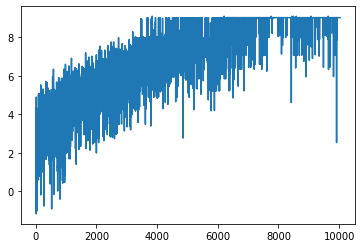

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [7]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []
    
cw_inventory_level = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1
    cw_inventory_level.append(info["CW Inv:"])
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | RW Invs: [9, 8] | CW Inv: 8 | Action: [0 1 0] | Reward: 0.11 | Manufacturer: 180 | 
Steps left: 28 | RW Invs: [8, 6] | CW Inv: 3 | Action: [0 1 0] | Reward: 0.17 | Manufacturer: 190 | 
Steps left: 27 | RW Invs: [7, 9] | CW Inv: 3 | Action: [0 1 0] | Reward: 0.16 | Manufacturer: 200 | 
Steps left: 26 | RW Invs: [6, 12] | CW Inv: 3 | Action: [0 1 0] | Reward: 0.16 | Manufacturer: 210 | 
Steps left: 25 | RW Invs: [5, 10] | CW Inv: 3 | Action: [1 1 0] | Reward: 0.17 | Manufacturer: 220 | 
Steps left: 24 | RW Invs: [4, 8] | CW Inv: 3 | Action: [0 0 0] | Reward: 0.19 | Manufacturer: 230 | 
Steps left: 23 | RW Invs: [3, 6] | CW Inv: 3 | Action: [1 0 1] | Reward: 0.21 | Manufacturer: 100 | 
Steps left: 22 | RW Invs: [2, 4] | CW Inv: 3 | Action: [1 0 0] | Reward: 0.26 | Manufacturer: 110 | 
Steps left: 21 | RW Invs: [1, 2] | CW Inv: 3 | Action: [1 1 1] | Reward: 0.36 | Manufacturer: 100 | 
Steps left: 20 | RW Invs: [0, 0] | CW Inv: 3 | Action: [1 1 0] | Reward: 0.75 | Manufactu

###### Inventory level graph

Regional warehouse 1


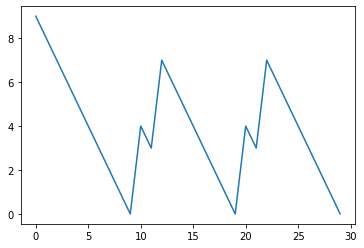

Regional warehouse 2


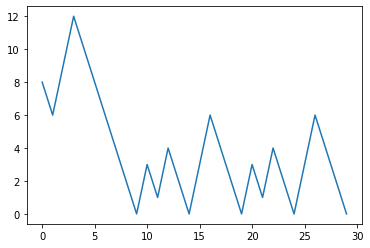

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()

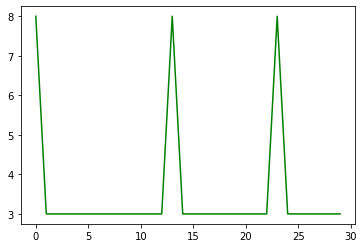

In [9]:
plt.plot(cw_inventory_level, color="green")
plt.show()